## ***import library***

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from helper_function import find_most_common_phrase_per_cluster

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import nltk
from nltk.corpus import stopwords


In [6]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["course", "learn", "project",'and', 'or', 'the', 'a', 'is', 'in', 'to'])

In [7]:
df = pd.read_csv('data\\coursera\\coursera_processed_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3424 non-null   object 
 1   University          3424 non-null   object 
 2   Difficulty Level    3424 non-null   object 
 3   Course Rating       3424 non-null   float64
 4   Course URL          3424 non-null   object 
 5   Course Description  3424 non-null   object 
 6   Skills              3424 non-null   object 
 7   ID                  3424 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 214.1+ KB


In [9]:
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(df['Skills'])

In [11]:
inertia = []
for k in range(4, 26):
    num_clusters = 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    kmeans.inertia_
    inertia.append(kmeans.inertia_)
    # print(df)

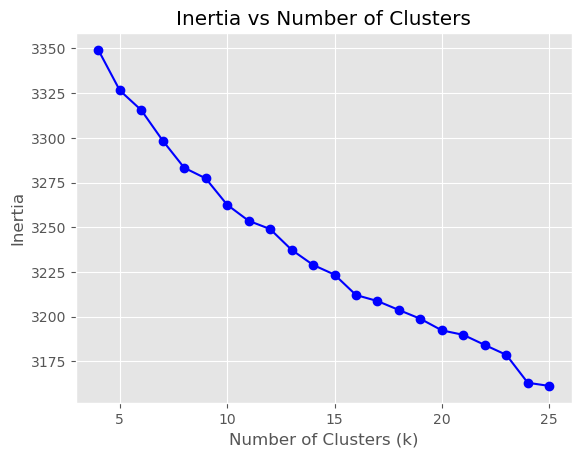

In [12]:
plt.plot(range(4, 26), inertia, marker='o', linestyle='-', color='b')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [13]:
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

df['Cluster'] = kmeans.labels_
# print(df)

In [14]:
df['Cluster'].value_counts()

Cluster
7     494
10    471
5     343
0     282
9     252
13    231
12    223
4     221
11    219
1     210
3     114
6     109
8      95
2      80
14     80
Name: count, dtype: int64

In [15]:
find_most_common_phrase_per_cluster(df, 'Cluster', 'Skills', custom_stopwords)

{1: [('arts', 222),
  ('history', 220),
  ('arts humanities', 215),
  ('humanities', 215),
  ('art', 205),
  ('music', 173),
  ('music art', 107),
  ('arts humanities music', 106),
  ('humanities music', 106),
  ('humanities music art', 106)],
 10: [('business', 810),
  ('finance', 317),
  ('management', 298),
  ('strategy', 286),
  ('business business', 224),
  ('analysis', 187),
  ('market', 178),
  ('financial', 151),
  ('business strategy', 147),
  ('business finance', 135)],
 2: [('engineering', 228),
  ('electrical', 123),
  ('electrical engineering', 120),
  ('engineering electrical', 83),
  ('engineering electrical engineering', 83),
  ('physical', 80),
  ('physical science', 80),
  ('physical science engineering', 80),
  ('science', 80),
  ('science engineering', 80)],
 9: [('security', 342),
  ('cloud', 301),
  ('computing', 205),
  ('information', 196),
  ('computer', 188),
  ('cloud computing', 174),
  ('technology', 170),
  ('information technology', 168),
  ('management',

In [16]:
# here i use chat gpt to write suggestion for each cluster
cluster_titles = {
    1: "Arts and Humanities",
    10: "Business and Finance",
    2: "Electrical Engineering",
    9: "Cybersecurity and Cloud Computing",
    7: "Computer Science and Software Development",
    0: "Leadership and Management",
    12: "Data Science and Analysis",
    5: "Health and Life Sciences",
    13: "Machine Learning and AI",
    11: "Social Sciences and Education",
    6: "Language and Writing",
    8: "Law and Social Studies",
    4: "Physical Sciences and Engineering",
    14: "Statistics and Probability",
    3: "Marketing and Business Strategy"
}

df['Cluster Title'] = df['Cluster'].map(cluster_titles)


In [20]:
df[df['Cluster'] == 9].head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,ID,Cluster,Cluster Title
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In course youll learn effectively retrieve dat...,"['Data', 'Analysis', 'select', '(sql)', 'datab...",5,9,Cybersecurity and Cloud Computing
12,Hacking Patching,University Colorado System,Advanced,3.4,https://www.coursera.org/learn/hacking-patching,"In MOOC, learn hack web apps command injection...","['Security', 'Design', 'design', 'pattern', 'w...",13,9,Cybersecurity and Cloud Computing
23,Preparing Google Cloud Professional Data Engin...,Google Cloud,Beginner,4.5,https://www.coursera.org/learn/preparing-cloud...,"From course: ""The best way prepare exam compet...","['business', 'requirements', 'Cloud', 'Computi...",24,9,Cybersecurity and Cloud Computing
27,AWS Elastic Beanstalk: Build & Deploy Node.js ...,Coursera Project Network,Advanced,5.0,https://www.coursera.org/learn/nodejs-api-aws-...,"In 1-hour long project-based course, learn cre...","['representational', 'state', 'transfer', 'uni...",28,9,Cybersecurity and Cloud Computing
34,Hybrid Cloud Service Mesh Anthos,Google Cloud,Beginner,4.8,https://www.coursera.org/learn/hybrid-cloud-se...,This on-demand course equips students understa...,"['authentication', 'multiplexed', 'transport',...",35,9,Cybersecurity and Cloud Computing


In [19]:
df.to_csv('coursera_processed_data_with_cluster.csv', index=False)